# TENSORFLOW LINEAR REGRESSION

# I. Tải và chuẩn hóa dữ liệu

In [10]:
# import thư viện numpy
import numpy as np
# import thư viện tensorflow
import tensorflow as tf
# import thư viện matplotlib
import matplotlib.pyplot as plt

# Tải dữ liệu data X và y đã được xử lý thành ma trận
data_X = np.load("F:/HK4/ML/Case_Study_#2/Boston_Housing_Data/train_X.npy") 
data_y = np.load("F:/HK4/ML/Case_Study_#2/Boston_Housing_Data/train_y.npy")
 
# Chuẩn hóa dữ liệu
def normalizer(dataset):
    # Tìm giá trung bình của mỗi đặc trưng
    mu = np.mean(dataset,axis=0)
    # Tìm độ lệch chuẩn của mỗi đặc trưng
    sigma = np.std(dataset,axis=0)
 
    return(dataset - mu)/sigma

# Thêm cột giá trị bias cho dữ liệu
def bias_vector(features,labels):
    # Lấy số lượng mẫu
    n_training_samples = features.shape[0]
    # Lấy số lượng đặc trưng
    n_dim = features.shape[1]
    # Thêm vào cột bias (cột toàn giá trị 1) cho ma trận thuộc tính
    f = np.reshape(np.c_[np.ones(n_training_samples),features],[n_training_samples,n_dim + 1])
    # Chuyển ma trận nhãn về kích thước Nx1
    l = np.reshape(labels,[n_training_samples,1]) 
    return f, l

train_X = normalizer(data_X)
train_X, train_y = bias_vector(train_X, data_y)

print("Đã tải và chuẩn hóa dữ liệu")

Đã tải và chuẩn hóa dữ liệu


# II. Xây dựng model

In [11]:
# Khởi tạo ma trận biến cho model tensorflow với giá trị khởi tạo tại mỗi phần tử là 0
W = tf.Variable(tf.zeros([train_X.shape[1], 1]))

# Xây dưng placeholder dùng để đổ dữ liệu train_X vào khi huấn luyện với kiểu dữ liệu liệu float32 và kích thước [?, 14] 
X = tf.placeholder(tf.float32, [None, train_X.shape[1]])
# Xây dưng placeholder dùng để đổ dữ liệu train_y vào khi huấn luyện với kiểu dữ liệu liệu float32 và kích thước [?, 1] 
y = tf.placeholder(tf.float32, [None, 1])

# Tính y_hat (tf.matmul tương đương phép nhân ma trận)
y_hat = tf.matmul(X, W)
# Tính cost (tf.square tương đương phép bình phương mỗi phần tử; tf.reduce_mean tương đương phép lấy trung bình cộng)
cost = tf.reduce_mean(tf.square(y - y_hat))

# Thiết lập phép tối ưu hóa cost bằng phương pháp Gradient Descent với learning rate = 0.01
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

# III. Train dữ liệu và tối ưu bằng BGD

epoch :  0       cost =  583.55634
epoch :  50       cost =  94.034325
epoch :  100       cost =  33.530106
epoch :  150       cost =  25.183605
epoch :  200       cost =  23.828995
epoch :  250       cost =  23.476223
epoch :  300       cost =  23.306595
epoch :  350       cost =  23.19523
epoch :  400       cost =  23.11503
epoch :  450       cost =  23.055454
epoch :  500       cost =  23.01037
epoch :  550       cost =  22.975725
epoch :  600       cost =  22.94871
epoch :  650       cost =  22.927347
epoch :  700       cost =  22.910223
epoch :  750       cost =  22.89633
epoch :  800       cost =  22.88493
epoch :  850       cost =  22.875471
epoch :  900       cost =  22.86755
epoch :  950       cost =  22.86087
epoch :  1000       cost =  22.855188
epoch :  1050       cost =  22.850334
epoch :  1100       cost =  22.846167
epoch :  1150       cost =  22.842564
epoch :  1200       cost =  22.839449
epoch :  1250       cost =  22.83674
epoch :  1300       cost =  22.834377
epoch 

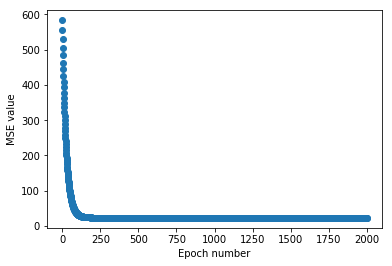

w_BGD = 
[[22.330013  ]
 [-0.6679162 ]
 [ 0.76808894]
 [-0.2631822 ]
 [ 0.32363784]
 [-2.111145  ]
 [ 2.7269046 ]
 [ 0.5228493 ]
 [-2.8915431 ]
 [ 2.1576388 ]
 [-1.7225759 ]
 [-2.1009629 ]
 [ 0.54265577]
 [-3.9758024 ]]


In [19]:
# Khởi tạo tất cả các biến
init = tf.global_variables_initializer()
# Khởi tạo phiên làm việc mới
session = tf.Session()
# Chạy các biến đã khởi tạo
session.run(init)

# List lưu các mse
all_mse = []
# Khởi tạo số vòng lặp
num = 2000
# Huấn luyện model
for e in range(num):
    # Đổ dữ liệu và huấn luyện
    result, err = session.run([train, cost], feed_dict = {X : train_X, y : train_y})
    # Thêm mse vào list
    all_mse.append(err)
    if e % 50 == 0:
        # In ra cost tại vòng lặp thứ e
        print("epoch : ", e, "      cost = ", err)

print("epoch : ", e, "      cost = ", err)

# Vẽ đồ thị biễu diễn cost qua từng vòng lặp
axis_x = list(range(num))
axis_y = all_mse
plt.scatter(axis_x, axis_y)
plt.xlabel("Epoch number")
plt.ylabel("MSE value")
plt.show()

print("w_BGD = ")
print(session.run(W))


# IV. Kiểm tra model được train và tối ưu bằng BGD

In [20]:
# Tải dữ liệu data X và y đã được xử lý thành ma trận
data_test_X = np.load("F:/HK4/ML/Case_Study_#2/Boston_Housing_Data/test_X.npy")
data_test_y = np.load("F:/HK4/ML/Case_Study_#2/Boston_Housing_Data/test_y.npy")

test_X = normalizer(data_test_X)
test_X, test_y = bias_vector(test_X, data_test_y)

# Tính y_hat khi đổ dữ liệu test_X
y_pred = session.run(y_hat, feed_dict={X: test_X})

# Tính mse
mse = session.run(tf.reduce_mean(tf.square(y_pred - test_y)))

print("MSE trên testset = ", mse)

MSE trên testset =  21.993622699190983


# V. Train dữ liệu và tối ưu bằng SGD

epoch :  0       cost =  583.55634
epoch :  1       cost =  26.478458
epoch :  2       cost =  26.446024
epoch :  3       cost =  26.496477
epoch :  4       cost =  26.535374
epoch :  5       cost =  26.565958
epoch :  6       cost =  26.589006
epoch :  7       cost =  26.605608
epoch :  8       cost =  26.617188
epoch :  9       cost =  26.625082
epoch :  9       cost =  26.625082


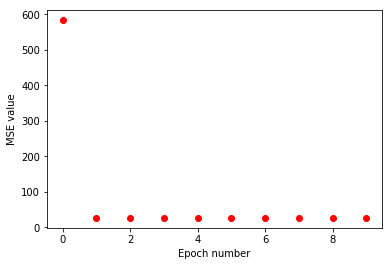

w_SGD = 
[[22.266798  ]
 [-1.111121  ]
 [ 0.92125255]
 [-0.2666778 ]
 [ 1.791278  ]
 [-2.6192296 ]
 [ 2.1373332 ]
 [ 1.1709343 ]
 [-3.186012  ]
 [ 2.256434  ]
 [-2.0579433 ]
 [-2.1424084 ]
 [ 0.91338456]
 [-4.780395  ]]


In [22]:
# Khởi tạo tất cả các biến
init = tf.global_variables_initializer()
# Khởi tạo phiên làm việc mới
session = tf.Session()
# Chạy các biến đã khởi tạo
session.run(init)

# List lưu các mse
all_mse = []
# Khởi tạo số vòng lặp
num = 10
# Huấn luyện model
for e in range(num):
    err = session.run(cost, feed_dict = {X : train_X, y : train_y})
    all_mse.append(err)
    # Lần lượt duyệt qua mối điểm dữ liệu trên tập train
    for i in range(train_X.shape[0]):
        # Đổ 1 điểm dữ liệu để train
        session.run(train, feed_dict = {X : train_X[i].reshape(1, train_X.shape[1]), y : train_y[i].reshape(1, 1)})
    if e % 1 == 0:
        # In ra cost tại vòng lặp thứ e
        print("epoch : ", e, "      cost = ", err)
print("epoch : ", e, "      cost = ", err)

# Vẽ đồ thị biễu diễn cost qua từng vòng lặp
axis_x = list(range(num))
axis_y = all_mse
plt.scatter(axis_x, axis_y, c='r', label='data')
plt.xlabel("Epoch number")
plt.ylabel("MSE value")
plt.show()

print("w_SGD = ")
print(session.run(W))

# VI. Kiểm tra model được train và tối ưu bằng SGD

In [23]:
# Tải dữ liệu data X và y đã được xử lý thành ma trận
data_test_X = np.load("F:/HK4/ML/Case_Study_#2/Boston_Housing_Data/test_X.npy")
data_test_y = np.load("F:/HK4/ML/Case_Study_#2/Boston_Housing_Data/test_y.npy")

test_X = normalizer(data_test_X)
test_X, test_y = bias_vector(test_X, data_test_y)

# Tính y_hat khi đổ dữ liệu test_X
y_pred = session.run(y_hat, feed_dict={X: test_X})

# Tính mse
mse = session.run(tf.reduce_mean(tf.square(y_pred - test_y)))

print("MSE trên testset = ", mse)

MSE trên testset =  23.000847492871912


# VII. Train dữ liệu và tối ưu bằng mini-BGD

epoch :  0       cost =  583.55634
epoch :  20       cost =  44.91137
epoch :  40       cost =  24.695063
epoch :  60       cost =  23.519375
epoch :  80       cost =  23.25425
epoch :  99       cost =  23.118303


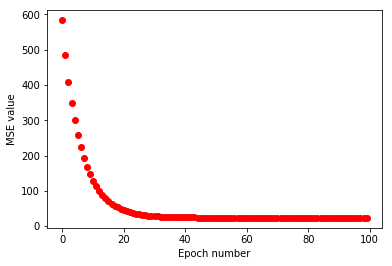

w_mBGD = 
[[22.327349  ]
 [-0.48807415]
 [ 0.56972444]
 [-0.64251375]
 [ 0.39108834]
 [-1.4892908 ]
 [ 3.0220976 ]
 [ 0.2940425 ]
 [-2.531935  ]
 [ 1.1701559 ]
 [-0.864132  ]
 [-1.9023503 ]
 [ 0.5702407 ]
 [-3.7716455 ]]


In [24]:
# Khởi tạo tất cả các biến
init = tf.global_variables_initializer()
# Khởi tạo phiên làm việc mới
session = tf.Session()
# Chạy các biến đã khởi tạo
session.run(init)

# Thiết lập batch size
batch_size = 84
# List lưu các mse
all_mse = []
# Khởi tạo số vòng lặp
num = 100
# Huấn luyện model
for e in range(num):
    err = session.run(cost, feed_dict = {X : train_X, y : train_y})
    all_mse.append(err)
    # Chia dữ liệu train ra thành từng phần với kích thước batch_sizex14
    for i in range(0, train_X.shape[0], batch_size):
        # Đổ phần dữ liệu được cắt vào để train
        session.run([train, cost], feed_dict = {X : train_X[i:i+batch_size].reshape(batch_size, train_X.shape[1]), y : train_y[i:i+batch_size].reshape(batch_size, 1)})
    if e % 20 == 0:
        print("epoch : ", e, "      cost = ", err)
print("epoch : ", e, "      cost = ", err)

# Vẽ đồ thị biễu diễn cost qua từng vòng lặp
axis_x = list(range(num))
axis_y = all_mse
plt.scatter(axis_x, axis_y, c='r', label='data')
plt.xlabel("Epoch number")
plt.ylabel("MSE value")
plt.show()

print("w_mBGD = ")
print(session.run(W))

# VIII. Kiểm tra model được train và tối ưu bằng mini-BGD

In [25]:
# Tải dữ liệu data X và y đã được xử lý thành ma trận
data_test_X = np.load("F:/HK4/ML/Case_Study_#2/Boston_Housing_Data/test_X.npy")
data_test_y = np.load("F:/HK4/ML/Case_Study_#2/Boston_Housing_Data/test_y.npy")


test_X = normalizer(data_test_X)
test_X, test_y = bias_vector(test_X, data_test_y)

# Tính y_hat khi đổ dữ liệu test_X
y_pred = session.run(y_hat, feed_dict={X: test_X})

# Tính mse
mse = session.run(tf.reduce_mean(tf.square(y_pred - test_y)))

print("MSE trên testset = ", mse)

MSE trên testset =  22.47396889158312


# IX. Train dữ liệu và tối ưu bằng Basic Normal Equations:

In [26]:
# Khởi tạo tất cả các biến
init = tf.global_variables_initializer()
# Khởi tạo phiên làm việc mới
session = tf.Session()
# Chạy các biến đã khởi tạo
session.run(init)

#Load data và gán vào biến
X_NE = train_X
y_NE = train_y
XT = tf.transpose(X_NE)

# w = (w0,... , wi) = ((XT. X)^-1 ). XT. y
w_NE = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT,X_NE)),XT),y_NE) 

with tf.Session() as sess:
    W = sess.run(w_NE)

print("w_NE = ", W)

w_NE =  [[22.33005952]
 [-0.68002615]
 [ 0.78172463]
 [-0.20132047]
 [ 0.31621891]
 [-2.12073671]
 [ 2.71913436]
 [ 0.52554617]
 [-2.88438238]
 [ 2.28644062]
 [-1.87282741]
 [-2.10662869]
 [ 0.54255769]
 [-3.97540854]]


# X. Kiểm tra Basic Normal Equations: 

In [27]:
# Tải dữ liệu data X và y đã được xử lý thành ma trận
data_test_X = np.load("F:/HK4/ML/Case_Study_#2/Boston_Housing_Data/test_X.npy")
data_test_y = np.load("F:/HK4/ML/Case_Study_#2/Boston_Housing_Data/test_y.npy")

test_X = normalizer(data_test_X)
test_X, test_y = bias_vector(test_X, data_test_y)

def MSE(w, y, X):
    # Tìm kết quả dự đoán (np.dot tương đương phép nhân ma trận)
    predict = np.dot(X, w)
    # Tính mse theo công thức
    mse = np.sum(((y - predict)**2)/X.shape[0])
    return mse

print("MSE trên testset = ", MSE(W, test_y, test_X))

MSE trên testset =  21.943712588179345


# XI. Dùng thư viện Sklearn

In [8]:
# import thư viện
from sklearn import linear_model
# khởi tạo biến
regr = linear_model.LinearRegression(fit_intercept=False)
# fit model
regr.fit(test_X, test_y)
# in ra giá trị W
print( 'W: ', regr.coef_ )
# dự đoán từ tập test
regr.predict(test_X)
# đánh giá dự đoán
regr.score(test_X, test_y)

W:  [[22.93352941 -1.42634609  1.70935018  0.69362814  1.37682657 -1.77950026
   2.61788709 -1.08089067 -3.78180601  3.0102741  -2.16952819 -1.99218793
   1.48086579 -3.37648493]]


0.7836641131693358